# Shop Customer - Clustering 

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to find different clusters of customers

*Import the most important libraries*

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [20]:
dataset = pd.read_csv('Customers.csv')
dataset

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## K-Means Clustering

### using the Annual Income ($) and the Spending Score (1-100)

In [21]:
X = dataset.iloc[:, [3, 4]].values

Finding the optimal number of clusters with the **Elbow Method**. The following plot shows the WCSS (Within Sum of Squares) for up to 11 clusters.

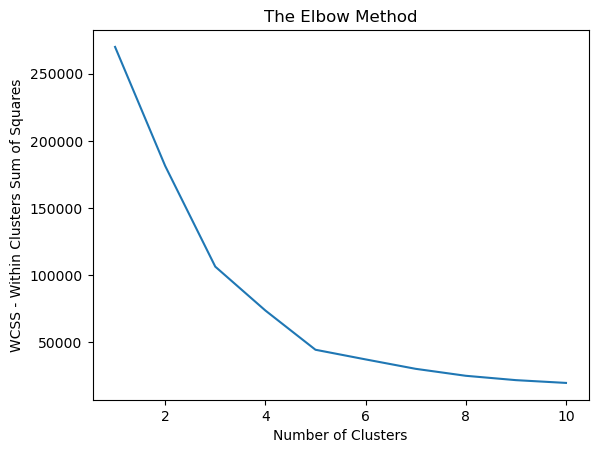

In [22]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

The 'elbow', where the rapid falling curve drastically decreases its falling, seems to be at **5 clusters**.

Training the K-Means Model on the Dataset:

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++')
prediction = kmeans.fit_predict(X)

Visualizing the clusters: 

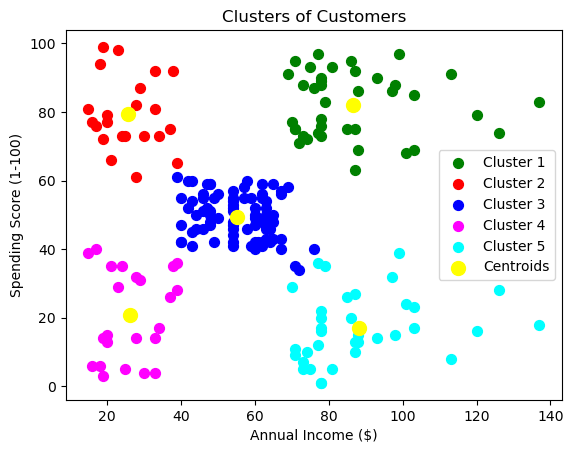

In [24]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s=50, c='magenta', label='Cluster 4')
plt.scatter(X[prediction == 4, 0], X[prediction == 4, 1], s=50, c='cyan', label='Cluster 5')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

These clusters represent distinct customers with similar income and spending patterns, enabling more effective marketing targeting. Specifically, Cluster 1 comprises customers with low income and high spending scores, Cluster 2 comprises customers with low income and low spending scores, Cluster 3 comprises customers with high income and high spending scores, Cluster 4 comprises customers with medium income and medium spending scores, and Cluster 5 comprises customers with high income but low spending scores. 

### using the Age and the Spending Score:

In [25]:
X = dataset.iloc[:, [2, 4]].values

Using the Elbow Method to find the optimal number of cluster again:

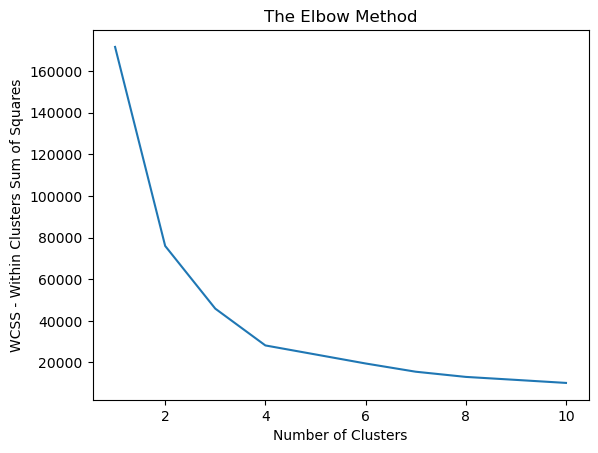

In [26]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

Here the 'elbow' seems to be at 4 clusters.

In [27]:
# predicting the cluster
kmeans = KMeans(n_clusters=4, init='k-means++')
prediction = kmeans.fit_predict(X)

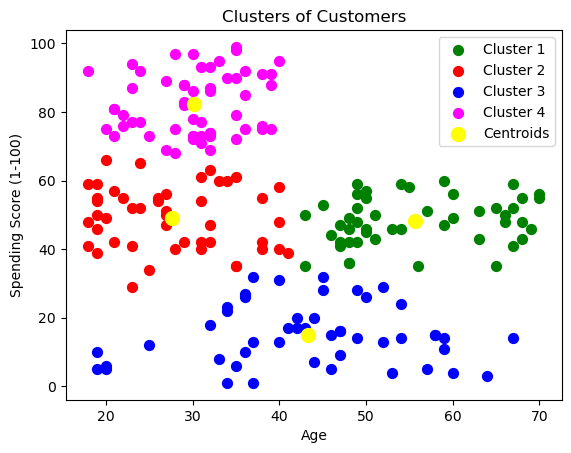

In [28]:


# visualization of the clustering
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s=50, c='magenta', label='Cluster 4')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

These clusters are distinct from those that result from analyzing spending score and income. In this analysis, Cluster 1 consists of customers of all ages with low spending scores, Cluster 2 includes young customers with high spending scores, Cluster 3 comprises young to middle-aged customers with medium spending scores, and Cluster 4 includes middle-aged to old customers with medium spending scores. Notably, this grouping has no old customers with high spending scores.

## Hierarchical Clustering

### using the Annual Income ($) and the Spending Score (1-100)

In [29]:
X = dataset.iloc[:, [3, 4]].values

First, I'm using a Dendrogram to find the optimal number of clusters with the method of **minimum variance**

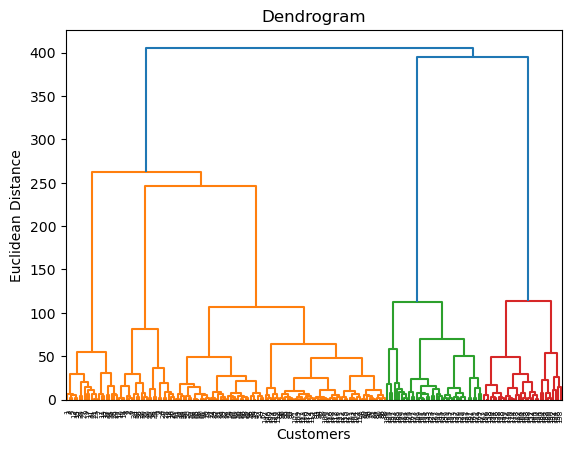

In [30]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

The left blue vertical line appears to be the biggest distance, so there should be 3 clusters. But it's not that much longer than the third yellow line which would result in 5 clusters as the optimal number. 

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
prediction = hc.fit_predict(X)

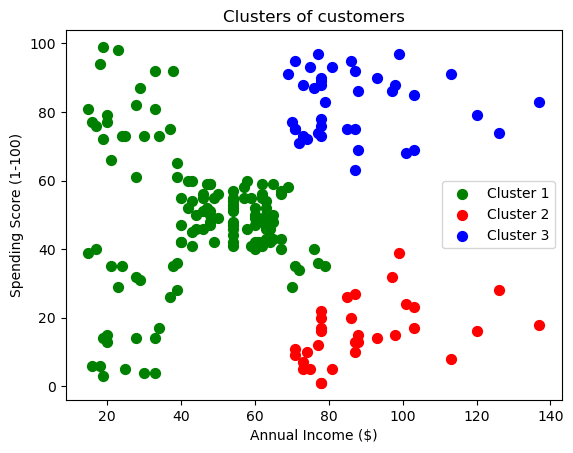

In [32]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

With only 3 clusters, all individuals with low to medium income are grouped together in one cluster, and there is no significant difference in their spending score. From a marketing perspective, this information suggests that it may be more effective to target individuals in Cluster 2 who have high income and a low spending score, as they have the highest potential for growth without risking overspending by those with lower income. 

### using the Age and the Spending Score (1-100)

In [33]:
X = dataset.iloc[:, [2, 4]].values

using a Dendrogram to find the optimal number of clusters with the method of **minimum variance**

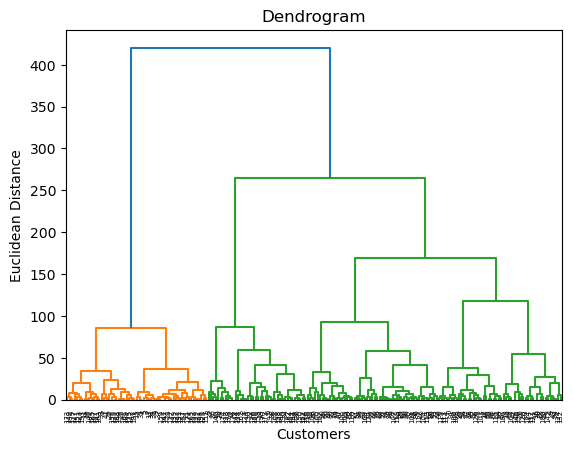

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

The right blue vertical line appears to be the longest which results in 2 as the optimal number of clusters. 

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
prediction = hc.fit_predict(X)

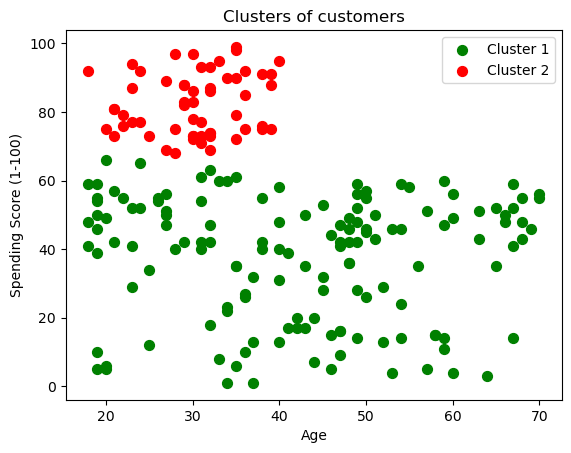

In [36]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

With only 2 clusters, Cluster 2 includes young customers with high spending scores, and Cluster 1 everyone else. 

**Clustering can help with identifying groups that share similarities without knowing many details about the dataset yet.**